In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Show the plots inline in the notebook
%matplotlib inline

pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Please upload the CSV file for review and evaluation. Suggested name of the file **"bank-additional-full.csv"**

In [ ]:
# Path for the data
data_path = 'bank-additional-full.csv'

# Create a dataframe
bank_data = pd.read_csv(data_path, sep=';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
bank_data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
print('Check for Null values:',bank_data.isnull().sum(), sep = '\n')

Check for Null values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**Exploratory Data Analysis**

Following graph shows:


*   Less duration, higher chances of getting 'No'
*   Self employed and management folks have significant contribution in saying 'yes'.



In [ ]:
fig = px.box(bank_data, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Below box plot evaluates if there is strong correlation between age and saying 'yes' or 'no' to the call. The data appears balanced in the following graph and demands further investigation.

In [ ]:
fig = px.box(bank_data, x="y", y="age", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Below Bar chart shows that the data is imbalanced as it contains more samples on 'No' than 'yes'.

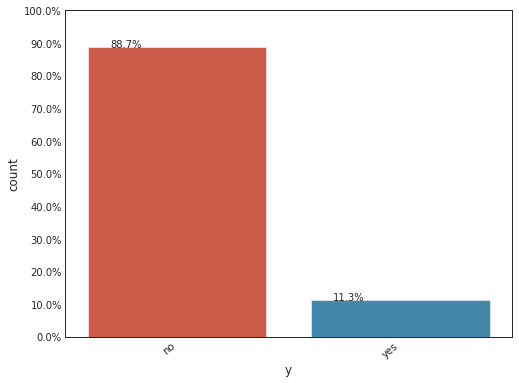

In [ ]:
plt.figure(figsize=(8,6))
Y = bank_data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=bank_data)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Below scatter plot show duration and responses were quite good in the beginning but started to go down as more campaigns were executed after first 10 campaigns.

In [ ]:
import plotly.express as px

fig = px.scatter(bank_data, x="campaign", y="duration", color="y")
fig.show()

Most of campaigns were launched during may - jul that is mid of the year. Campaign launch time usually plays a crucial role in success and failure.

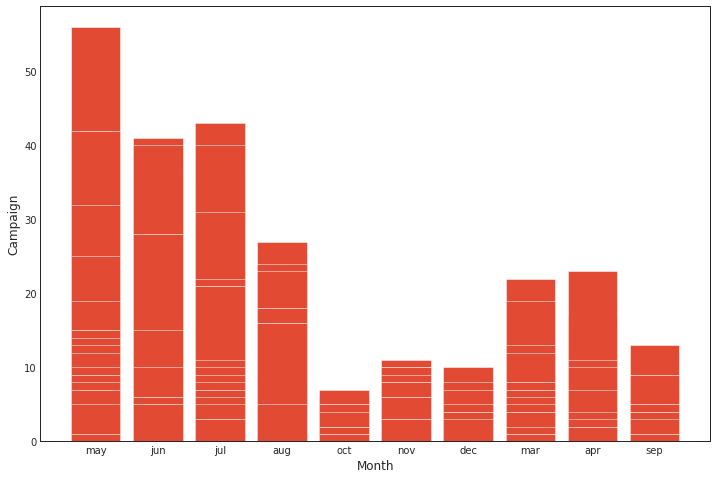

In [ ]:
plt.bar(bank_data['month'], bank_data['campaign'])
plt.xlabel("Month")
plt.ylabel("Campaign")
plt.show()

Plot positive response and attrbiutes

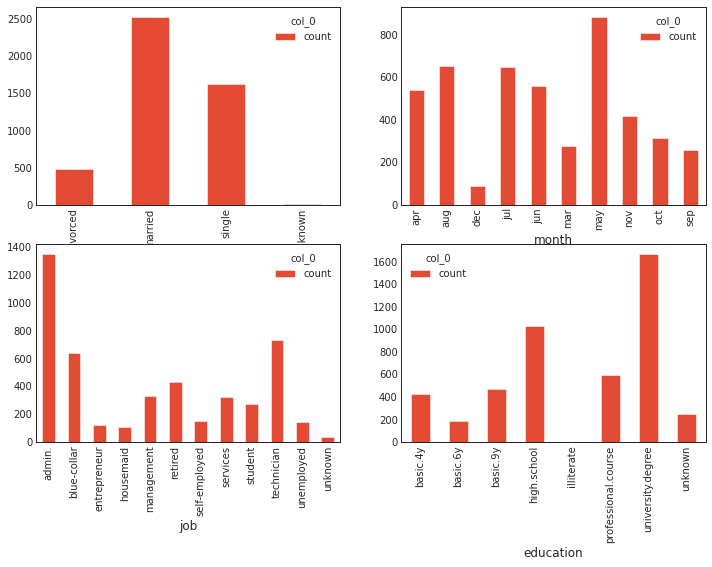

In [ ]:
pos_res = bank_data[bank_data['y']=='yes']


df_marital = pd.crosstab(index = pos_res["marital"], columns="count")
df_month = pd.crosstab(index = pos_res["month"], columns="count")
df_job =  pd.crosstab(index = pos_res["job"], columns="count")
df_edu =  pd.crosstab(index = pos_res["education"], columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df_marital.plot.bar(ax=axes[0,0])
df_month.plot.bar(ax=axes[0,1])
df_job.plot.bar(ax=axes[1,0])
df_edu.plot.bar(ax=axes[1,1])

Below Correlation matrix tells us a lot about correlated features.
emp.var.rate is highly correlated with cons.price.idx and nr.employed. Similarly, euribor3m is highly correalted with with cons.price.idx and nr.employed.

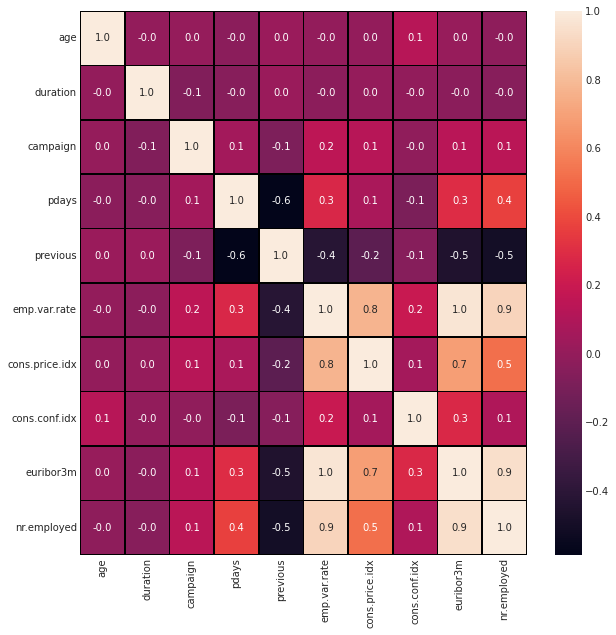

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank_data.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

**Outlier Detection**

Text(0.5, 1.0, 'No of employees')

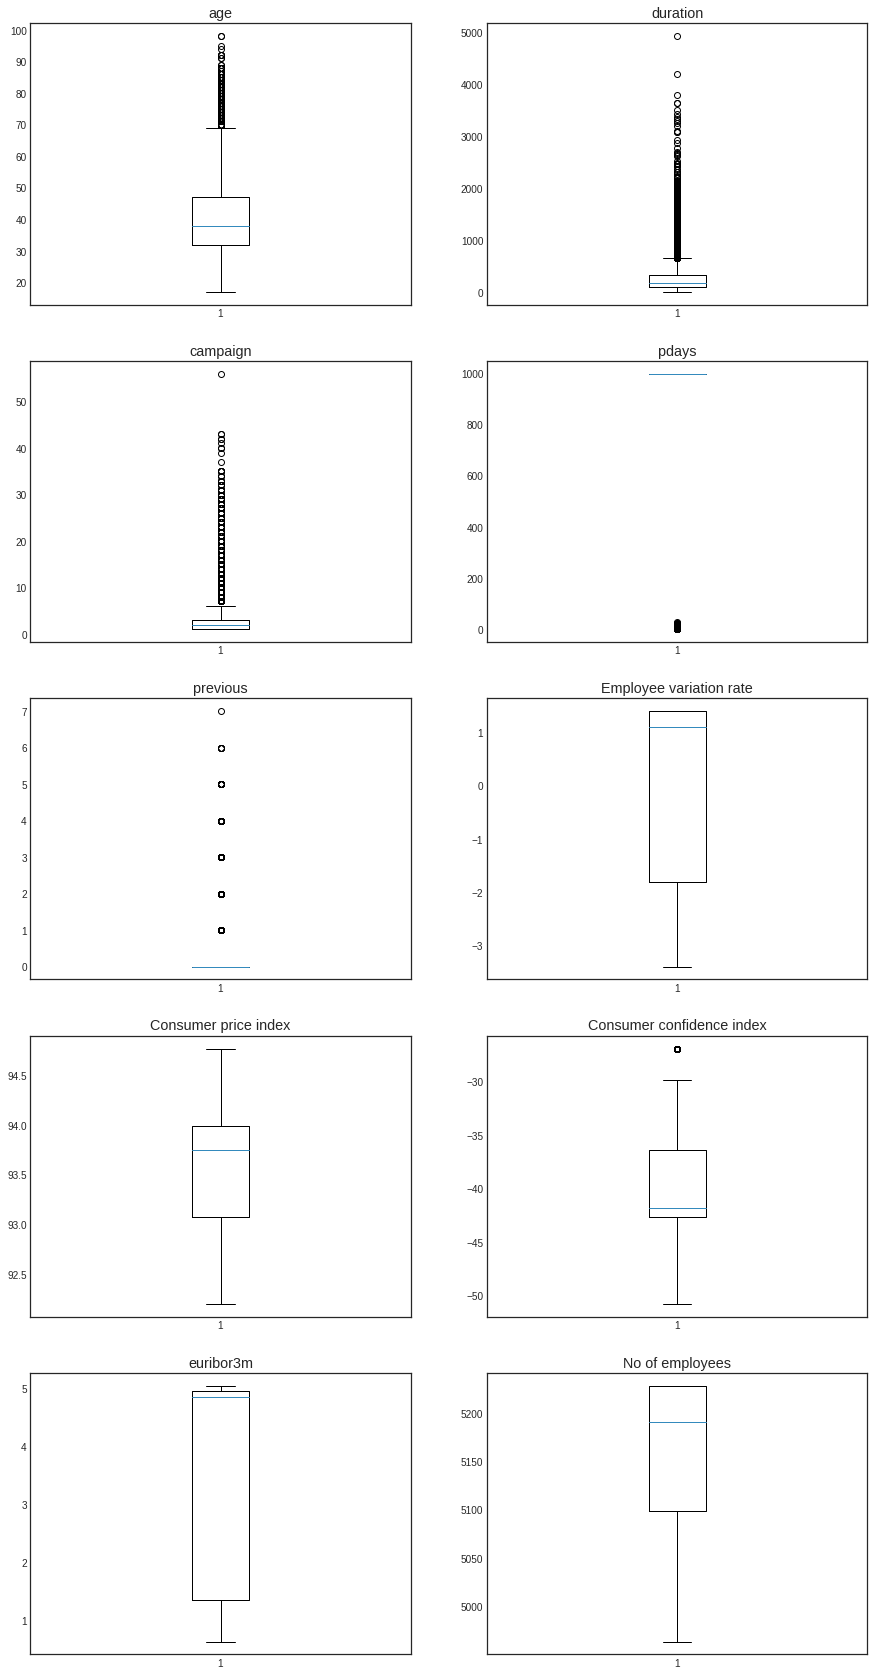

In [ ]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')

ax = plt.subplot(521)
plt.boxplot(bank_data['age'])
ax.set_title('age')

ax=plt.subplot(522)
plt.boxplot(bank_data['duration'])
ax.set_title('duration')

ax=plt.subplot(523)
plt.boxplot(bank_data['campaign'])
ax.set_title('campaign')

ax=plt.subplot(524)
plt.boxplot(bank_data['pdays'])
ax.set_title('pdays')

ax=plt.subplot(525)
plt.boxplot(bank_data['previous'])
ax.set_title('previous')

ax=plt.subplot(526)
plt.boxplot(bank_data['emp.var.rate'])
ax.set_title('Employee variation rate')

ax=plt.subplot(527)
plt.boxplot(bank_data['cons.price.idx'])
ax.set_title('Consumer price index')

ax=plt.subplot(528)
plt.boxplot(bank_data['cons.conf.idx'])
ax.set_title('Consumer confidence index')

ax=plt.subplot(529)
plt.boxplot(bank_data['euribor3m'])
ax.set_title('euribor3m')

ax=plt.subplot(5,2,10)
plt.boxplot(bank_data['nr.employed'])
ax.set_title('No of employees')

Age, Duration and Campaign data attributes have outliers. One possible solution to fix outliers is to use IQR method and replace the outliers.

In [ ]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_data[cols].quantile(0.25)
    Q3 = bank_data[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (bank_data[cols] >= Q1 - 1.5 * IQR) & (bank_data[cols] <= Q3 + 1.5 *IQR)
    bank_data=bank_data.loc[filter]

Text(0.5, 1.0, 'campaign')

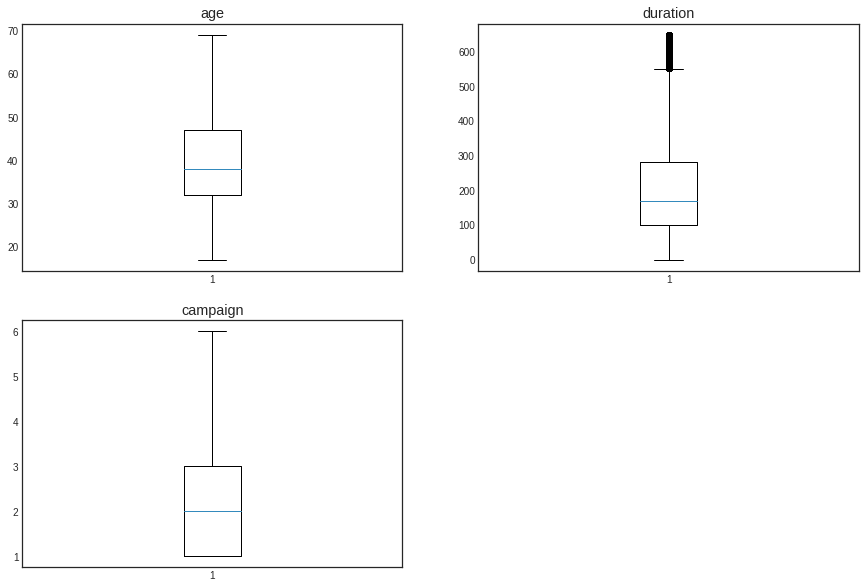

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)

plt.boxplot(bank_data['age'])
ax.set_title('age')
ax=plt.subplot(222)

plt.boxplot(bank_data['duration'])
ax.set_title('duration')
ax=plt.subplot(223)

plt.boxplot(bank_data['campaign'])
ax.set_title('campaign')

Encode Month and day_of_week features to numerical data.

In [ ]:
#create copy of original data
bd_copy = bank_data.copy()

In [ ]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bd_copy['month']= bd_copy['month'].map(month_dict)

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bd_copy['day_of_week']= bd_copy['day_of_week'].map(day_dict)

In [ ]:
bd_copy.loc[bd_copy['pdays'] == 999, 'pdays'] = 0

Label Encode housing, default, loan and target variable 'y'.

In [ ]:
dictionary={'yes':1,'no':0,'unknown':-1}
bd_copy['housing']=bd_copy['housing'].map(dictionary)
bd_copy['default']=bd_copy['default'].map(dictionary)
bd_copy['loan']=bd_copy['loan'].map(dictionary)

In [ ]:
dictionary1={'no':0,'yes':1}
bd_copy['y']=bd_copy['y'].map(dictionary1)

Apply one hot encoding on contact and poutcome features obviously this will introduce more features into the data.

In [ ]:
dummy_contact=pd.get_dummies(bd_copy['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bd_copy['poutcome'], prefix='dummy',drop_first=True)
bd_copy = pd.concat([bd_copy,dummy_contact,dummy_outcome],axis=1)
bd_copy.drop(['contact','poutcome'],axis=1, inplace=True)

Label Encode job and education features.

In [ ]:
dictionary = {'unknown':0,'unemployed':1, 'student':2,'management':3, 'technician':4, 'entrepreneur':5, 'blue-collar':6, 'retired':7, 'admin.':8, 'services':9, 'self-employed':10, 'housemaid':11}
bd_copy['job'] = bd_copy['job'].map(dictionary)

In [ ]:
dictionary = {'university.degree':7, 'high.school':5, 'basic.9y':4, 'professional.course':6,
       'basic.4y':2, 'basic.6y':3, 'unknown':0, 'illiterate':1}
bd_copy['education'] = bd_copy['education'].map(dictionary)

In [ ]:
dictionary = {'divorced':0,'single':1,'married':2,'unknown':3}
bd_copy['marital'] = bd_copy['marital'].map(dictionary)

Apply standardization to numerical features. This will scale numerical features to zero-mean unit-variance.

In [ ]:
bank_scale=bd_copy.copy()

Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal', 'marital']

#skip encoded categorical variables
feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]
scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,default,housing,loan,month,day_of_week,y,dummy_telephone,dummy_nonexistent,dummy_success,marital,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,11,2,0,0,0,5,2,0,1,1,0,2,1.694643,0.383434,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
1,9,5,-1,0,0,5,2,0,1,1,0,2,1.797965,-0.413575,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
2,9,5,0,1,0,5,2,0,1,1,0,2,-0.268482,0.134369,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
3,8,3,0,0,0,5,2,0,1,1,0,2,0.041485,-0.399342,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002
4,9,5,0,0,1,5,2,0,1,1,0,2,1.694643,0.710777,-0.813061,-0.161001,-0.354645,0.660543,0.741263,0.891988,0.72072,0.340002


In [ ]:
features = scaled_data.drop(['y'],axis=1)
target = scaled_data.y

I used ExtraTreesClassifer to select important features and include them into final model training. As an alternative correlation matrix can be constructed. As mentioned in the assignmet 'Duration' has high correalation with output variable so I am not using duration as a feature because this feature would only get a value after the call.

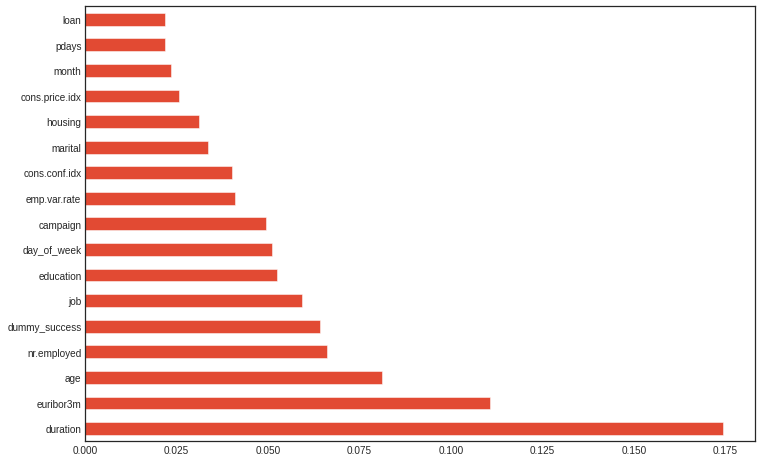

In [ ]:
model = ExtraTreesClassifier()
model.fit(features,target)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [ ]:
X = features.drop(['pdays','month','cons.price.idx','loan','housing','duration', 'emp.var.rate'],axis=1)
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)

In [ ]:
X_train.shape

(28448, 14)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
clf.score(X_test, y_test)

0.9326585125825952

In [ ]:
y_pred = clf.predict(X_test)

**Performance Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6484   54]
 [ 425  150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      6538
           1       0.74      0.26      0.39       575

    accuracy                           0.93      7113
   macro avg       0.84      0.63      0.67      7113
weighted avg       0.92      0.93      0.92      7113



In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

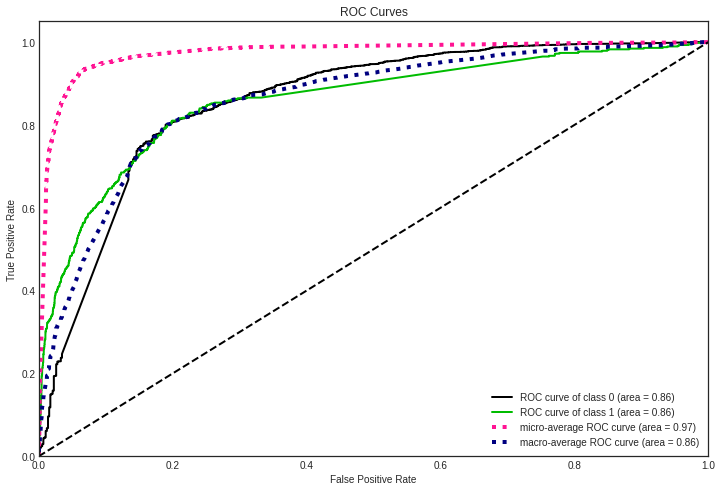

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

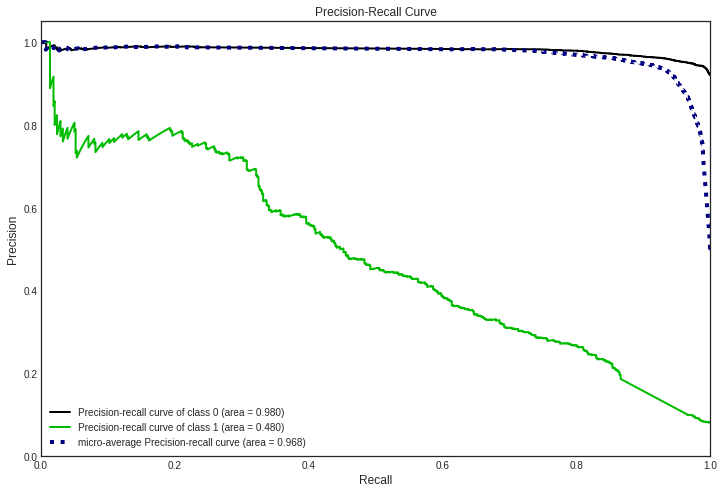

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

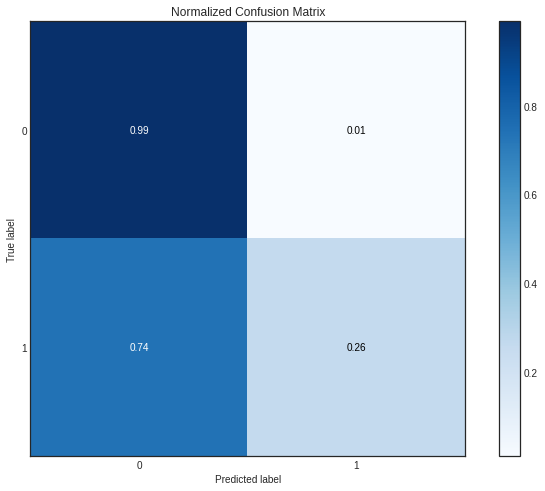

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
# skplt.metrics.plot_cumulative_gain(y_true=y, y_probas=probas)
plt.show()